In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
n_samples=1500
random_state=170
X,y=make_blobs(n_samples=n_samples,random_state=random_state)

Text(0.5, 1.0, 'labels returned by Kmeans')

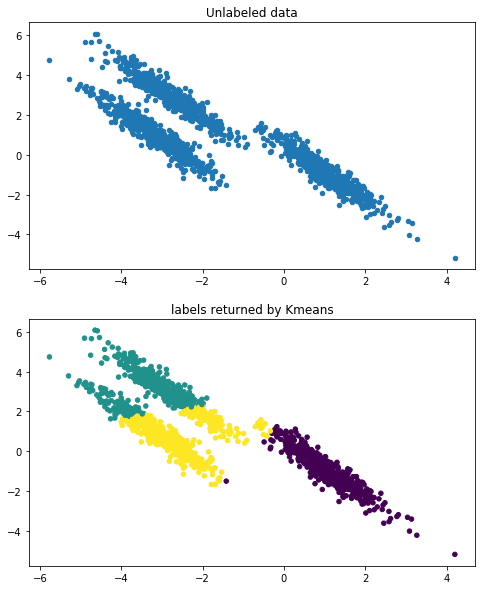

In [3]:
transformation=[[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso=np.dot(X,transformation)

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.scatter(X_aniso[:,0],X_aniso[:,1],s=20)
plt.title("Unlabeled data")

y_pred=KMeans(n_clusters=3,random_state=random_state).fit_predict(X_aniso)

plt.subplot(212)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_pred,s=20)
plt.title("labels returned by Kmeans")

In [4]:
from scipy.spatial import distance

In [5]:
rbf_param =7.6
K=np.exp(-rbf_param*distance.cdist(X_aniso,X_aniso,metric='sqeuclidean'))

In [6]:
D=K.sum(axis=1)
D=np.sqrt(1/D)
M=np.multiply(D[np.newaxis,:],np.multiply(K,D[:,np.newaxis]))

In [7]:
from scipy import linalg
from sklearn.preprocessing import normalize

In [8]:
U, Sigma,_=linalg.svd(M,full_matrices=False,lapack_driver='gesvd')
Usubset=U[:,0:3]

In [10]:
y_pred_sc=KMeans(n_clusters=3).fit_predict(normalize(Usubset))

Text(0.5, 1.0, 'labels returned by Spectral Clustering')

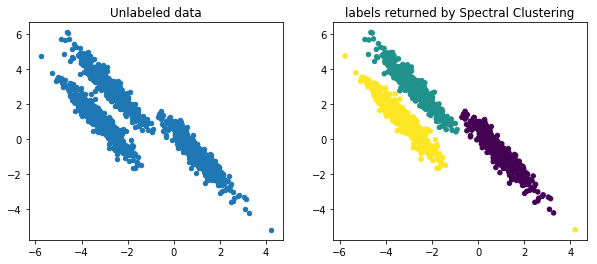

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X_aniso[:,0],X_aniso[:,1],s=20)
plt.title("Unlabeled data")

y_pred=KMeans(n_clusters=3,random_state=random_state).fit_predict(X_aniso)

plt.subplot(122)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_pred_sc,s=20)
plt.title("labels returned by Spectral Clustering")